<a href="https://colab.research.google.com/github/bmnds/uea-data-science-04-data-processing/blob/main/%5BAtividade04%5D_Discretiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 04 - Normalização e Discretização

Equipe: 
* Alberto Lins
* Bruno Mendes

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset kc_house_data.csv

In [2]:
# Baixando os datasets
%%time
!curl -o datasets_aula2.tar.gz -s -OL 'https://drive.google.com/uc?export=download&id=1wu8uSaqMQ4kdJRoXUew8KoBHophG5lBk'
!tar -zxvf datasets_aula2.tar.gz
!rm datasets_aula2.tar.gz

datasets_aula2/
datasets_aula2/countries.csv
datasets_aula2/Customers.csv
datasets_aula2/flags.csv
datasets_aula2/kc_house_data.csv
datasets_aula2/Orders.csv
CPU times: user 14.3 ms, sys: 18.7 ms, total: 33 ms
Wall time: 1.36 s


In [3]:
df = pd.read_csv('datasets_aula2/kc_house_data.csv')
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')
df.sample(10)

21613 linhas e 21 colunas


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12276,644000102,20150413T000000,650000.0,3,1.00,1520,10227,1.0,0,0,4,6,1520,0,1951,0,98004,47.5872,-122.196,2710,10912
16783,2767604254,20140603T000000,425000.0,2,2.50,1140,1182,3.0,0,0,3,8,1140,0,2007,0,98107,47.6713,-122.383,1290,1189
11659,7635801370,20140904T000000,530000.0,3,2.00,3080,17700,1.0,0,0,4,8,1740,1340,1965,0,98166,47.4695,-122.366,2100,15100
9662,2624039133,20140611T000000,514000.0,3,1.75,1720,5899,1.0,0,1,3,8,1220,500,1986,0,98136,47.5399,-122.385,1900,6244
20624,3629700030,20150223T000000,635000.0,3,3.00,2290,1407,2.5,0,0,3,8,1890,400,2014,0,98027,47.5446,-122.017,2230,1407
6933,7937600380,20150217T000000,435000.0,4,2.00,1960,50112,1.0,0,0,4,7,1050,910,1963,0,98058,47.4353,-122.084,2340,44967
6711,5652600185,20140502T000000,750000.0,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,0,98115,47.6954,-122.292,1570,10578
5277,1787600224,20150310T000000,390000.0,3,2.50,1640,6991,1.0,0,0,3,7,1110,530,1967,0,98125,47.7255,-122.327,1860,7342
3420,8679600100,20150130T000000,465000.0,5,1.50,1750,12491,1.0,0,0,3,6,1390,360,1961,0,98033,47.6995,-122.174,1560,12473
5974,2804100095,20140516T000000,724800.0,3,2.00,2050,3933,1.0,0,0,3,8,1180,870,1926,2001,98112,47.6436,-122.303,1940,4000


## Manter apenas os atributos de interesse
* price, yr_built, yr_renovated, sqft_living, sqft_lot, sqft_lot15 e condition

In [4]:
df = df.filter(['price', 'yr_built', 'yr_renovated', 
                'sqft_living', 'sqft_lot', 'sqft_lot15', 'condition'])
df.sample(10)

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15,condition
2492,339950.0,1959,0,1320,11457,9800,3
7174,205000.0,1944,0,860,7467,7467,3
2154,245990.0,1942,2014,1040,8410,8410,3
1237,438000.0,1961,0,1650,12940,12600,4
12748,750000.0,1984,0,3050,7020,5900,3
21308,580000.0,2008,0,1460,951,1282,3
3285,315000.0,2000,0,580,7200,7560,3
79,720000.0,2002,0,3450,39683,39750,3
15201,542000.0,1985,0,2220,12056,12025,3
17197,110000.0,1945,0,1250,53143,217800,5


## Discretizar `condition`

In [5]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [6]:
df['condition'] = df.apply(lambda row: 1 if row['condition'] > 3 else 0, axis=1)
df['condition'].value_counts()

0    14233
1     7380
Name: condition, dtype: int64

## Discretizar `yr_renovated`

In [7]:
np.sort(df.yr_renovated.unique())

array([   0, 1934, 1940, 1944, 1945, 1946, 1948, 1950, 1951, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [8]:
df['yr_renovated'] = df.apply(lambda row: 1 if row['yr_renovated'] > 0 else 0, axis=1)
df['yr_renovated'].value_counts()

0    20699
1      914
Name: yr_renovated, dtype: int64

## Procurar a importância de cada atributo usando três métodos.(comparar)

In [9]:
df.sample(10)

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15,condition
1617,370000.0,2006,0,1250,1655,3001,0
12652,370000.0,2005,0,2490,4244,4748,0
9570,725000.0,1990,0,3580,54450,35943,0
10004,462500.0,1977,0,2350,51400,51400,0
9351,263500.0,1977,0,2210,6375,7210,0
8830,490600.0,1986,0,3316,11447,11447,0
13728,1325000.0,1990,0,4010,37076,35326,1
5180,835000.0,1944,1,2520,6690,5792,1
17805,380000.0,1955,0,1430,11173,11659,0
21000,485000.0,2011,0,2430,5867,5866,0


In [10]:
array_n = df.values
X = array_n[:,0:6]
Y = array_n[:,6]

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2

def select_features(c, fun):
  print(f'Analyzing {c}({fun})')
  test = c(score_func=fun, k='all')
  fit = test.fit(X, Y)

  np.set_printoptions(precision=3)

  features = fit.transform(X)
  
  print("Features sorted by their scores:")
  print(sorted(zip(map(lambda x: round(x, 4), fit.scores_), 
                  df.columns), 
              reverse=True))
  print('')
  feature_importance = fit.scores_
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + 0.5
  plt.subplot(1,2,2)
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  m_name = np.array(df.columns)
  plt.yticks(pos, m_name[sorted_idx])
  plt.xlabel('Importância Relativa')
  plt.show()

O algoritmo escolhido para cálculo da importância foi o `SelectKBest`, comparando o resultado das funções `f_classif`, `mutual_info_classif` e `chi2`.

Podemos notar que o `chi2` apresentou como mais relevantes aqueles atributos que possuem valores absolutos mais altos.

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function f_classif at 0x7f29293a4598>)
Features sorted by their scores:
[(3595.4398, 'yr_built'), (168.9417, 'sqft_living'), (98.733, 'yr_renovated'), (1.7163, 'sqft_lot15'), (0.3796, 'price'), (0.3424, 'sqft_lot')]



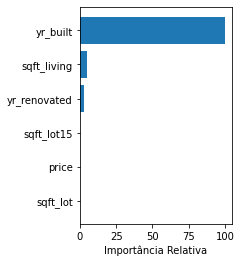

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function mutual_info_classif at 0x7f2926b9c950>)
Features sorted by their scores:
[(0.1427, 'yr_built'), (0.045, 'sqft_lot15'), (0.0392, 'sqft_lot'), (0.0107, 'sqft_living'), (0.0049, 'yr_renovated'), (0.0027, 'price')]



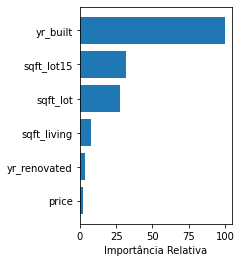

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function chi2 at 0x7f29293a46a8>)
Features sorted by their scores:
[(100204.6786, 'sqft_lot15'), (94742.4029, 'price'), (67988.4666, 'sqft_living'), (38881.7901, 'sqft_lot'), (1349.449, 'yr_built'), (94.1363, 'yr_renovated')]



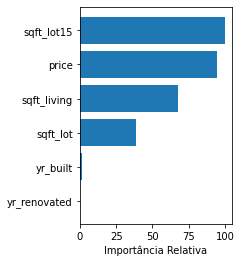

In [12]:
select_features(SelectKBest, f_classif)

select_features(SelectKBest, mutual_info_classif)

select_features(SelectKBest, chi2)

## Normalizar os dados e novamente Procurar a importância de cada atributo usando três métodos. (comparar)

In [13]:
def normalize_column_values(df, column):
  print(f'column={column}; min={df[column].min()}; max={df[column].max()}')
  df[column] = (df[column] - df[column].min())/(df[column].max()-df[column].min())

In [14]:
columns_to_normalize = ['price',	'yr_built',	
                        'sqft_living',	'sqft_lot',	'sqft_lot15']
for column in columns_to_normalize:
  normalize_column_values(df, column)

df.sample(10)

column=price; min=75000.0; max=7700000.0
column=yr_built; min=1900; max=2015
column=sqft_living; min=290; max=13540
column=sqft_lot; min=520; max=1651359
column=sqft_lot15; min=651; max=871200


,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15,condition
10852,0.066230,0.895652,0,0.122264,0.006681,0.012520,0
3326,0.064787,0.452174,0,0.255094,0.006096,0.015179,1
5021,0.032131,0.417391,0,0.049811,0.002905,0.006242,0
6141,0.024131,0.417391,0,0.069434,0.010218,0.015815,1
1135,0.045246,0.669565,0,0.200000,0.004909,0.008477,0
2194,0.024918,0.686957,0,0.132830,0.006057,0.010285,0
803,0.072131,0.930435,0,0.203774,0.008823,0.014273,0
4778,0.041311,0.486957,0,0.125283,0.007099,0.013037,0
741,0.050361,0.252174,0,0.066415,0.002645,0.005502,0
5240,0.126295,0.486957,0,0.208302,0.005079,0.009480,1


Podemos constatar que após a normalização, o atributo `yr_built` foi definido como o mais importante pelas 3 funções.

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function f_classif at 0x7f29293a4598>)
Features sorted by their scores:
[(3595.4398, 'yr_built'), (168.9417, 'sqft_living'), (98.733, 'yr_renovated'), (1.7163, 'sqft_lot15'), (0.3796, 'price'), (0.3424, 'sqft_lot')]



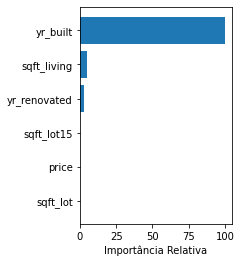

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function mutual_info_classif at 0x7f2926b9c950>)
Features sorted by their scores:
[(0.1388, 'yr_built'), (0.0464, 'sqft_lot15'), (0.0383, 'sqft_lot'), (0.0065, 'sqft_living'), (0.0056, 'yr_renovated'), (0.0012, 'price')]



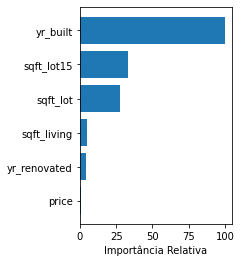

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function chi2 at 0x7f29293a46a8>)
Features sorted by their scores:
[(325.7291, 'yr_built'), (94.1363, 'yr_renovated'), (5.9626, 'sqft_living'), (0.1213, 'sqft_lot15'), (0.0244, 'sqft_lot'), (0.0144, 'price')]



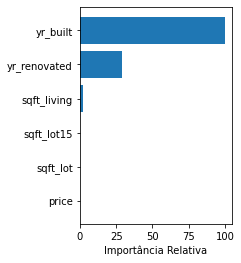

In [15]:
array_n = df.values
X = array_n[:,0:6]
Y = array_n[:,6]

select_features(SelectKBest, f_classif)

select_features(SelectKBest, mutual_info_classif)

select_features(SelectKBest, chi2)

## Discretizar os atributos e novamente Procurar a importância de cada atributo usando três métodos. (comparar)

In [16]:
df.sample(10)

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15,condition
8406,0.057049,0.469565,0,0.108679,0.003465,0.006420,0
5322,0.059672,0.069565,0,0.096604,0.001502,0.002698,1
18153,0.039082,0.513043,0,0.117736,0.005534,0.009226,0
9404,0.024525,0.817391,0,0.104906,0.005924,0.010566,1
8380,0.034098,0.947826,0,0.175094,0.002581,0.004761,0
14797,0.063607,0.000000,0,0.080755,0.003207,0.005931,0
10621,0.049115,0.773913,0,0.160000,0.033565,0.063500,0
10323,0.055082,0.626087,0,0.088302,0.005597,0.008925,1
4984,0.064918,0.860870,0,0.177358,0.006843,0.012825,0
19450,0.106695,0.773913,0,0.245283,0.022899,0.040520,0


In [19]:
df.describe()['price']['50%']

0.04918032786885246

In [24]:
def discretizar_valores(df, column):
  threshold = df.describe()[column]['50%']
  print(f'Discretizando valores da coluna {column}:')
  print(f'\t1 caso seja maior que {threshold}')
  print(f'\t0, caso contrário')
  df[column] = df.apply(lambda row: 1 if row[column] > threshold else 0, axis=1)
  print(df[column].value_counts())
  print('')


In [25]:
discretizar_valores(df, 'yr_built')
discretizar_valores(df, 'price')
discretizar_valores(df, 'sqft_living')
discretizar_valores(df, 'sqft_lot')
discretizar_valores(df, 'sqft_lot15')

Discretizando valores da coluna yr_built:
	1 caso seja maior que 0.0
	0, caso contrário
0    10934
1    10679
Name: yr_built, dtype: int64

Discretizando valores da coluna price:
	1 caso seja maior que 0.0
	0, caso contrário
0    10864
1    10749
Name: price, dtype: int64

Discretizando valores da coluna sqft_living:
	1 caso seja maior que 0.0
	0, caso contrário
0    10820
1    10793
Name: sqft_living, dtype: int64

Discretizando valores da coluna sqft_lot:
	1 caso seja maior que 0.0
	0, caso contrário
0    10807
1    10806
Name: sqft_lot, dtype: int64

Discretizando valores da coluna sqft_lot15:
	1 caso seja maior que 0.0
	0, caso contrário
0    10821
1    10792
Name: sqft_lot15, dtype: int64



Observamos que a discretização sobre as variáveis já normalizadas não afetou o grau de importância dos atributos em nenhuma das funções comparadas.

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function f_classif at 0x7f29293a4598>)
Features sorted by their scores:
[(3531.7753, 'yr_built'), (373.5205, 'sqft_lot15'), (358.014, 'sqft_lot'), (98.733, 'yr_renovated'), (64.8949, 'sqft_living'), (0.7724, 'price')]



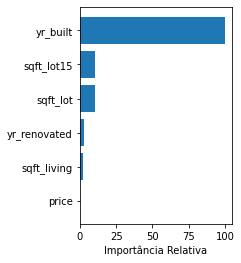

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function mutual_info_classif at 0x7f2926b9c950>)
Features sorted by their scores:
[(0.074, 'yr_built'), (0.0117, 'sqft_lot15'), (0.0094, 'sqft_lot'), (0.0029, 'price'), (0.0012, 'yr_renovated'), (0.0, 'sqft_living')]



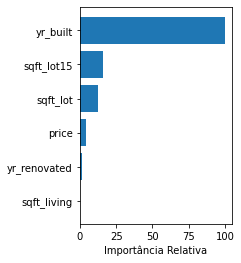

Analyzing <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>(<function chi2 at 0x7f29293a46a8>)
Features sorted by their scores:
[(1535.8858, 'yr_built'), (183.8505, 'sqft_lot15'), (176.1143, 'sqft_lot'), (94.1363, 'yr_renovated'), (32.3937, 'sqft_living'), (0.3883, 'price')]



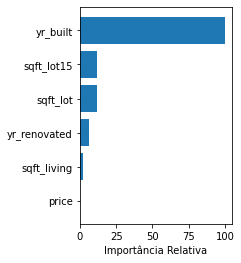

In [26]:
array_n = df.values
X = array_n[:,0:6]
Y = array_n[:,6]

select_features(SelectKBest, f_classif)

select_features(SelectKBest, mutual_info_classif)

select_features(SelectKBest, chi2)

## Diminuir as dimensões do DataFrame

Para manter apenas 4 atributos de maior relevância, optamos por descartar o `price` que apresentou a menor relevância nas 3 comparações e `sqft_lot` por ter a mesma relevância de `sqft_lot15`

In [28]:
df_result = df.filter(['yr_built', 'yr_renovated', 'sqft_living',
              'sqft_lot15','condition'])
df_result.sample(10)

,yr_built,yr_renovated,sqft_living,sqft_lot15,condition
5859,0,0,0,1,0
21079,0,0,0,1,1
7301,1,0,1,1,0
18659,0,0,0,0,1
3917,0,0,0,1,1
11317,0,0,0,0,0
6137,1,0,0,0,0
18211,1,0,1,1,0
20504,1,0,1,0,0
11280,0,0,1,0,1


## Armazenar num novo arquivo .csv

In [29]:
df_result.to_csv('kc_house_data_result.csv')